Выполнить предсказание временного ряда. Разделить данные нужно не смешивая прошлое и будущее. Использовать Electric_Production.
Использовать sarima / Prophet.
Docker / собрать контейнер с tf + добавить свои данные.

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

import datetime


In [2]:
csv_file = 'Electric_Production.csv'
electric_df = pd.read_csv(csv_file)
electric_df


,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [3]:
electric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


В столбце Data хранятся строки, поэтому приводим столбец к соответствующему типу, визуализируем временной ряд.

In [4]:
electric_df['DATE'] = pd.to_datetime(electric_df['DATE'])
electric_df = electric_df.sort_values(by='DATE')
electric_df


,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


<Axes: xlabel='DATE', ylabel='IPG2211A2N'>

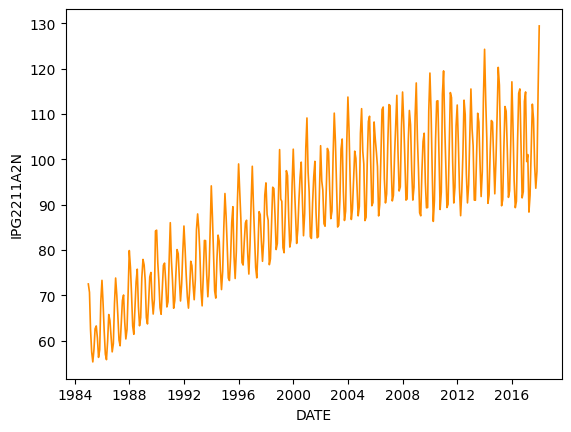

In [5]:
# visualize time series
sb.lineplot(data=electric_df, x='DATE', y='IPG2211A2N', color='darkorange', lw=1.2)


In [6]:
# split dataset into train and test
split_ratio = int(0.8 * len(electric_df))

train_df = electric_df[:split_ratio].copy()
test_df = electric_df[split_ratio:].copy()

print(len(train_df), len(test_df))


317 80


In [7]:
arima_best = auto_arima(train_df['IPG2211A2N'], start_p=0, start_q=0, m=12, seasonal=True, stationary=False)
arima_best.get_params()


{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 1, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [ ]:
sarima_model = SARIMAX(train_df['IPG2211A2N'], order=arima_best.get_params()['order'], seasonal_order=arima_best.get_params()['seasonal_order'])
results = sarima_model.fit()
sarima_pred = results.get_forecast(steps=len(test_df)).predicted_mean


<Axes: xlabel='DATE', ylabel='IPG2211A2N'>

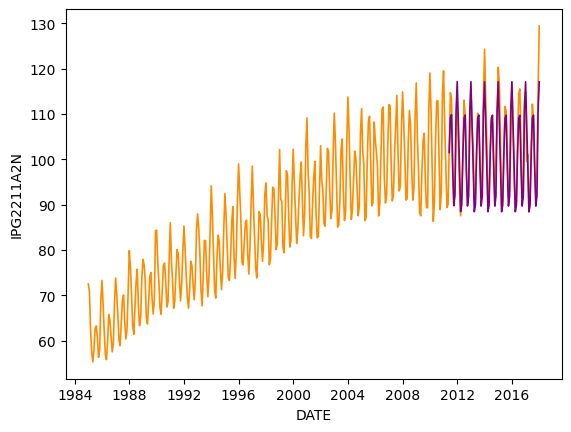

In [16]:
sb.lineplot(data=electric_df, x='DATE', y='IPG2211A2N', color='darkorange', lw=1.2)
sb.lineplot(x=test_df['DATE'], y=sarima_pred, color='purple', lw=1.2)


In [18]:
rmse = root_mean_squared_error(test_df['IPG2211A2N'], sarima_pred)
mae = mean_absolute_error(test_df['IPG2211A2N'], sarima_pred)

print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae) 
print('Average IPG2211A2N test set value:', test_df['IPG2211A2N'].mean())


Root Mean Squared Error: 3.71918785757149
Mean Absolute Error: 2.8741475827825775
Average IPG2211A2N test set value: 102.71854125
